In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
train = pd.read_csv('house_prices/train.csv')
test = pd.read_csv('house_prices/test.csv')
sample_sub = pd.read_csv('house_prices/sample_submission.csv')
test = pd.merge(test,sample_sub,on='Id')

In [166]:
# explore = train.describe(include='all').T
# explore['null'] = len(alldata) - explore['count']
# explore.insert(0,'dtype',alldata.dtypes) 
# explore.T.to_csv('explore2.csv')

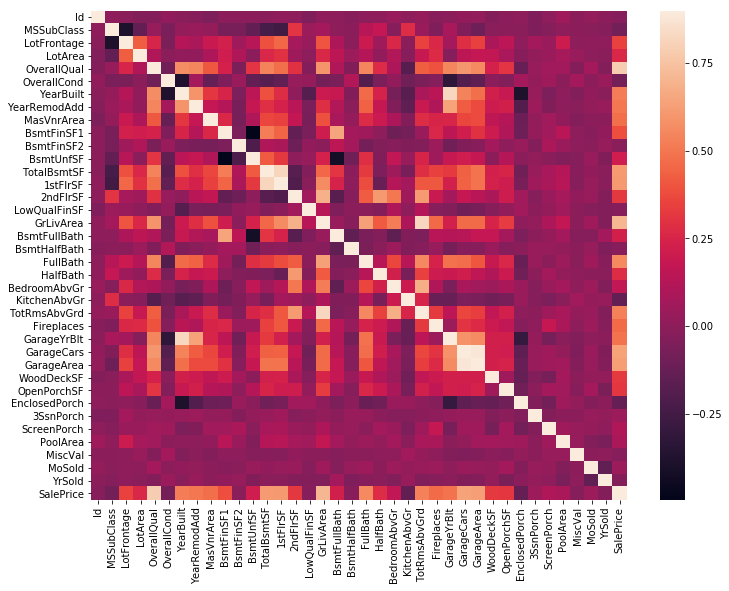

In [167]:
#相关性分析
correlation = train.corr()
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(correlation,vmax=0.9)
# ax2 = fig.add_subplot(2,1,2)


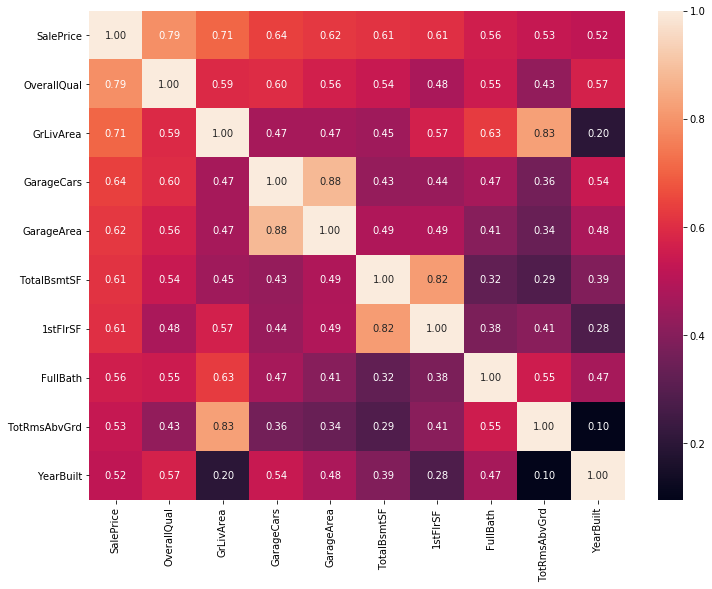

In [168]:
#查看影响最终价格的是个变量
k=10
cols = correlation.nlargest(k,'SalePrice').index#获得与SalePrice相关性最大的是个变量
k_correlation = correlation.reindex(index=cols,columns=cols)

fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(k_correlation,annot=True,fmt='.2f')#annot->annotate：注释，在网格中显示数据，fmt:显示数据格式

In [169]:
correlation[abs(correlation.SalePrice)>0.5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431


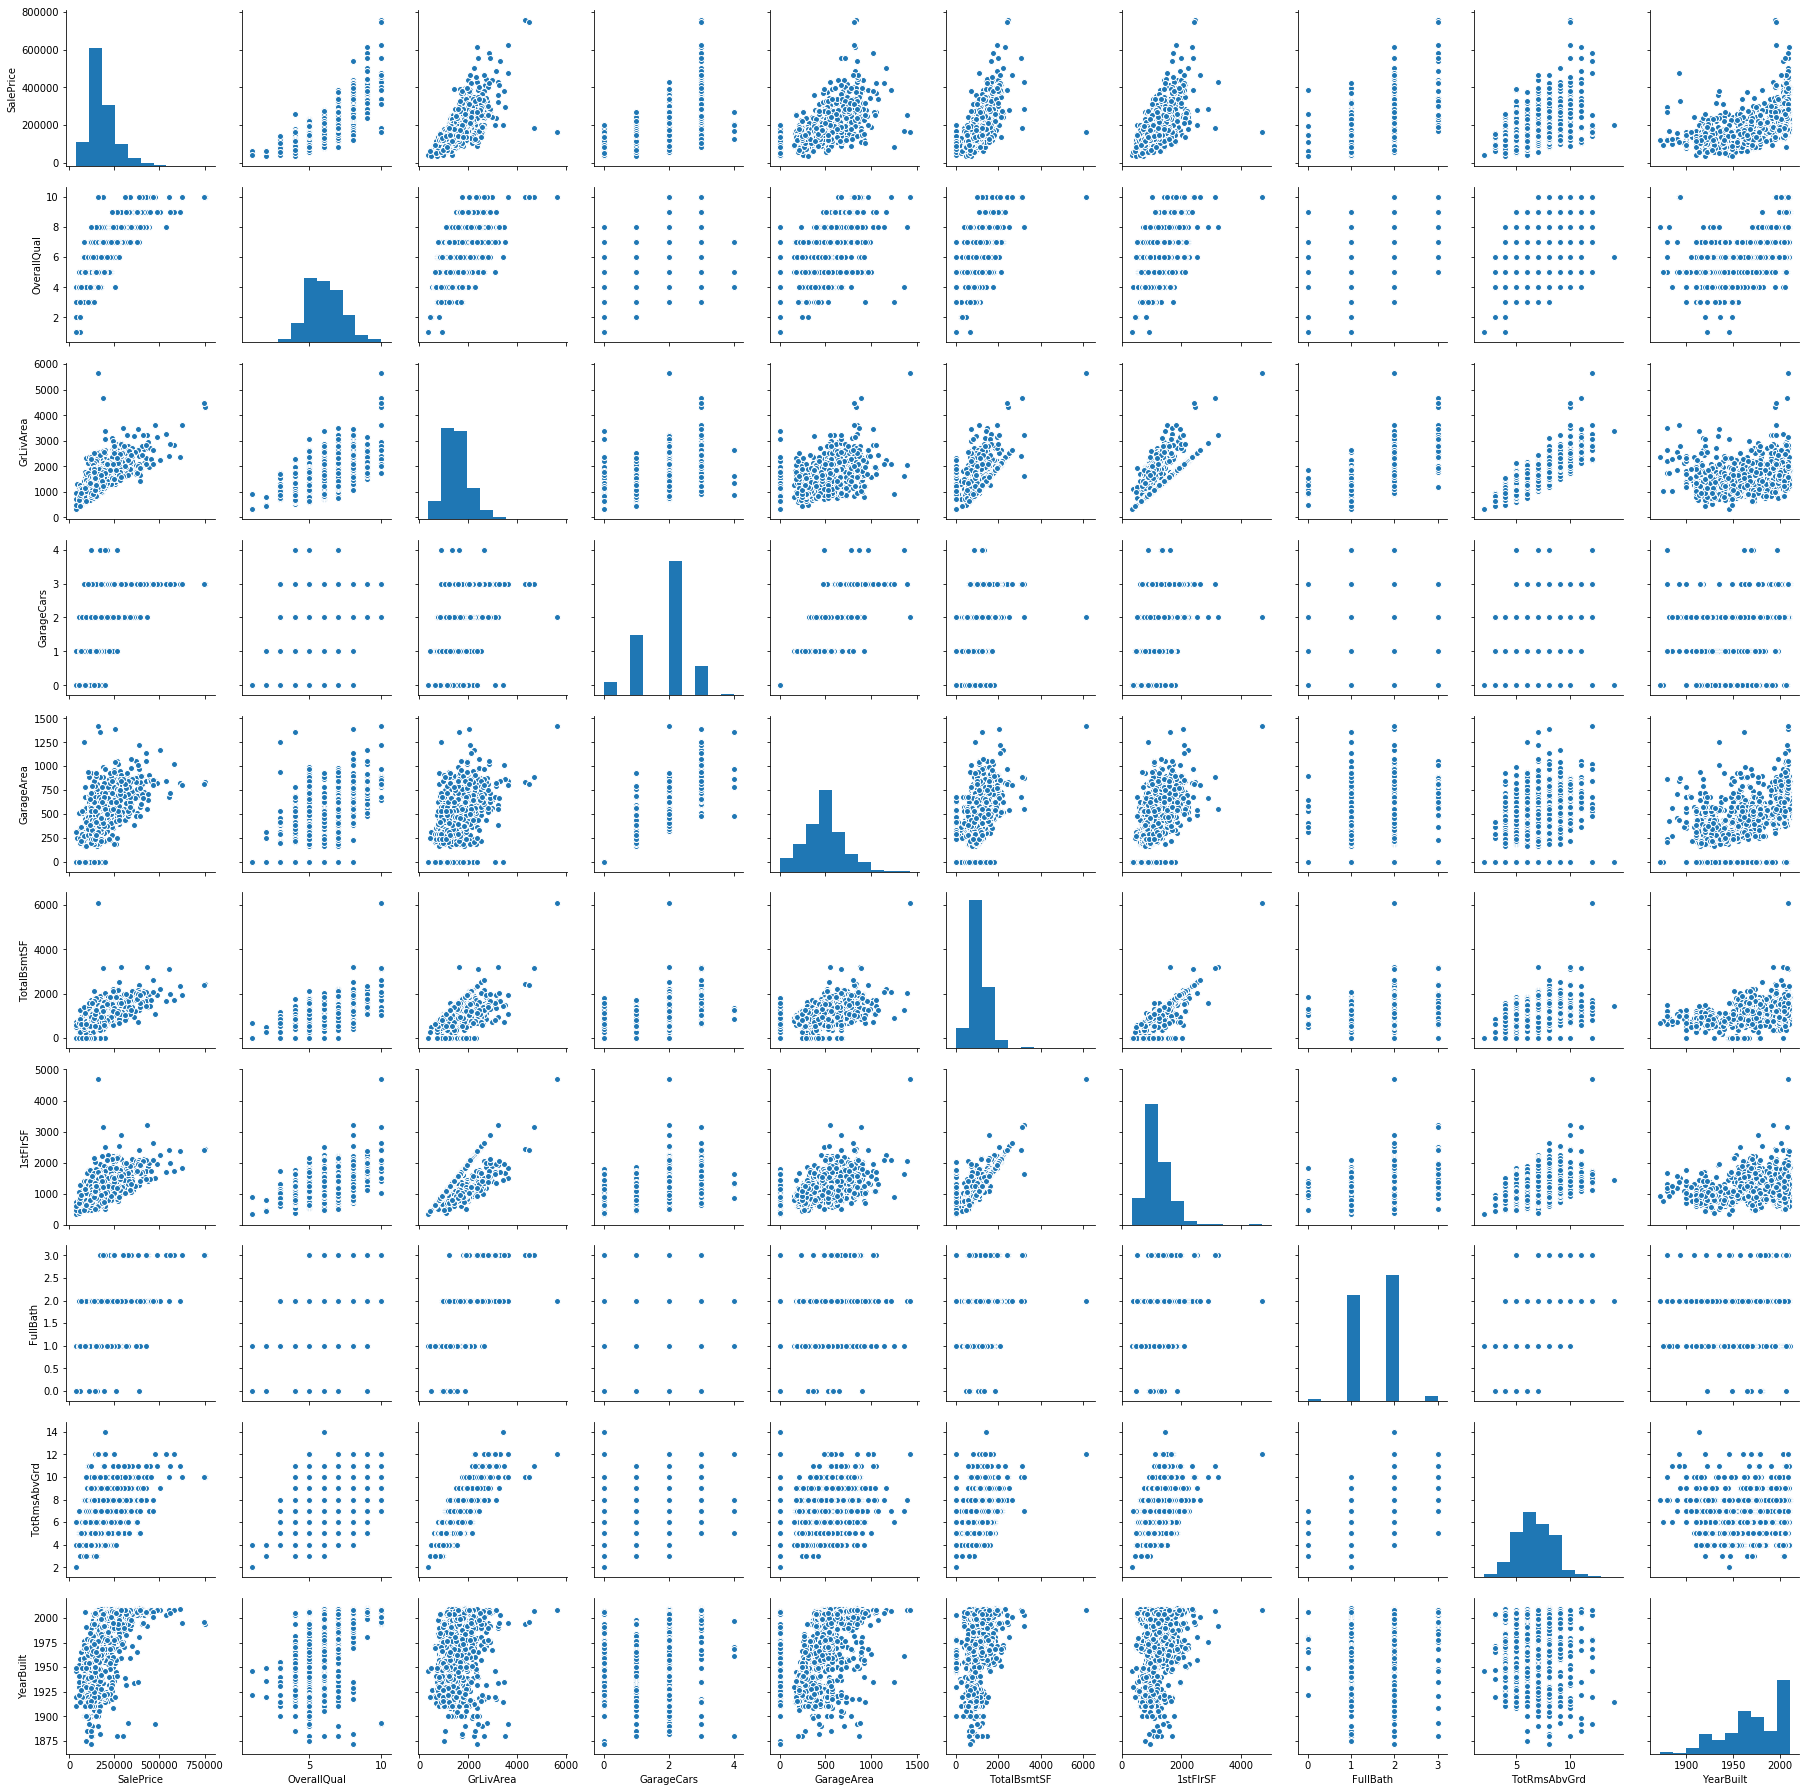

In [170]:
#scatterplot 绘制散点图矩阵注意：多变量作图数据中不能有空值，否则出错
fig = plt.figure(figsize=(20,14))
sns.pairplot(train[cols],size=2.5)


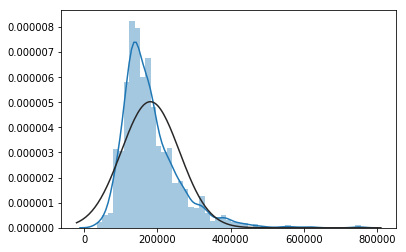

In [171]:
from scipy import stats 
#查看是否符合正态分布
# plt.hist(train.SalePrice.values,bins=100)#直方图，
sns.distplot(train.SalePrice.values,fit=stats.norm)#分布图
# res = stats.probplot(train['SalePrce'],plot=plt)

In [172]:
#skewness()偏度      kurt()峰度
print("峰度：%f"%train['SalePrice'].kurt())
print("偏度：%f"%train['SalePrice'].skew())

峰度：6.536282
偏度：1.882876


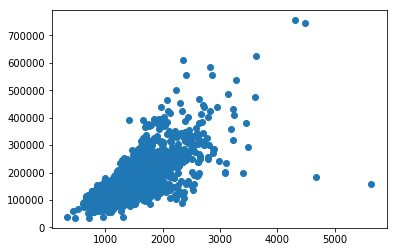

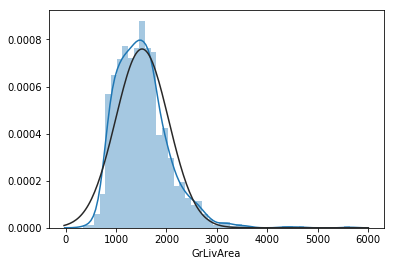

In [173]:
#查看SalePrice和GrLivArea的关系
# train.GrLivArea.describe()
fig = plt.figure()
plt.scatter(train.GrLivArea,train.SalePrice)
fig = plt.figure()
sns.distplot(train.GrLivArea,fit=stats.norm)
# res = stats.probplot(train['GrLivArea'],plot=plt)

        counts        ms_mean
MoSold                       
1           58  183256.258621
2           52  177882.000000
3          106  183253.924528
4          141  171503.262411
5          204  172307.269608
6          253  177395.735178
7          234  186331.192308
8          122  184651.827869
9           63  195683.206349
10          89  179563.977528
11          79  192210.911392
12          59  186518.966102


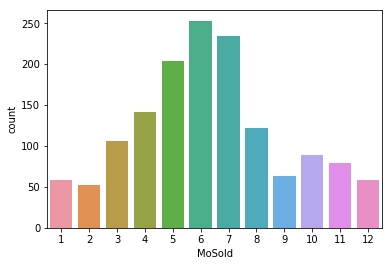

In [174]:
#查看不同月份房子的销售量
# train.MoSold.head(12)
# train.MoSold.describe()
mosold = pd.concat([train['SalePrice'].groupby(train['MoSold']).count(),
                    train['SalePrice'].groupby(train['MoSold']).mean()],axis=1)
mosold.columns = ['counts','ms_mean']
print(mosold)
fig = plt.figure()
sns.countplot(x='MoSold',data=train)
# fig = plt.figure()
# plt.bar(mosold.index,mosold['ms_mean'])


In [175]:
#查看缺失值，编写缺失值情况方法
#训练集train
null_num = train.isnull().sum().sort_values(ascending=False)
num_percent = null_num/len(train)
train_missing = pd.concat([null_num,num_percent],axis=1)
train_missing.columns = ['total','percent']
print(train_missing[train_missing['total']> 0])
#测试集test
null_num = test.isnull().sum().sort_values(ascending=False)
num_percent = null_num/len(test)
test_missing = pd.concat([null_num,num_percent],axis=1)
test_missing.columns = ['total','percent']
print(test_missing[test_missing['total']>0])
# def check_mssing(alldata):
#     """
#     return:DataFrame,-->columns=[
#     alldata_na:总数据的缺失值
#     ]
#     """

              total   percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
              total   percent
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
FireplaceQu     730  0.500343
LotFrontage     227  0.155586
GarageFinish     78  0.053461
GarageYrBlt      78  0.053461
GarageCond       78  0.053461
GarageQual       78  0.053461
GarageType       76  0.052090
BsmtCond         45  0.030843
BsmtQual  

In [176]:
#关于pool相关空值,PoolQC（质量）和PoolArea（面积）
#PoolQC,int显示，没有为0（1453个），与PoolArea相对应缺失为1453
train.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [177]:
#打印PoolQC和PoolArea非空的数据
train[train.PoolQC.notnull()].loc[:,['SalePrice','PoolQC','PoolArea']].sort_values(by='PoolQC')

,SalePrice,PoolQC,PoolArea
197,235000,Ex,512
1182,745000,Ex,555
810,181000,Fa,648
1386,250000,Fa,519
1170,171000,Gd,576
1298,160000,Gd,480
1423,274970,Gd,738


In [178]:
#PoolQC空值用None填充
train['PoolQC'] = train['PoolQC'].fillna('None')
test['PoolQC'] = test['PoolQC'].fillna('None')

In [179]:
#Garage*类缺失值情况
train[train.GarageType.isnull()].loc[:,
                ['GarageCond','GarageQual','GarageYrBlt','GarageFinish','GarageType']]
#Garage*类存在缺失相同的缺失都是81个缺失值

,GarageCond,GarageQual,GarageYrBlt,GarageFinish,GarageType
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN


In [180]:
cols = ['GarageCond','GarageQual','GarageYrBlt','GarageFinish','GarageType']
train.loc[:,cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
GarageCond      1379 non-null object
GarageQual      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageType      1379 non-null object
dtypes: float64(1), object(4)
memory usage: 57.1+ KB


In [181]:
#对Garage*object填充“None”
train[['GarageCond','GarageQual','GarageFinish','GarageType']] = \
train[['GarageCond','GarageQual','GarageFinish','GarageType']].fillna('None')
test[['GarageCond','GarageQual','GarageFinish','GarageType']] = \
test[['GarageCond','GarageQual','GarageFinish','GarageType']].fillna('None')
#GarageYrBlt是int类型尚未填充

In [182]:
#Bsmt*处理 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
#'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath','BsmtQual', 'BsmtUnfSF',
train[['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2','BsmtFinType1', 
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath','BsmtQual', 'BsmtUnfSF',]].isnull().sum()

BsmtCond        37
BsmtExposure    38
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1    37
BsmtFinType2    38
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual        37
BsmtUnfSF        0
dtype: int64

In [183]:
test[['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2','BsmtFinType1', 
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath','BsmtQual', 'BsmtUnfSF',]].isnull().sum()

BsmtCond        45
BsmtExposure    44
BsmtFinSF1       1
BsmtFinSF2       1
BsmtFinType1    42
BsmtFinType2    42
BsmtFullBath     2
BsmtHalfBath     2
BsmtQual        44
BsmtUnfSF        1
dtype: int64

In [184]:
test[test['BsmtFullBath'].isnull()].loc[:,['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2','BsmtFinType1', 
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath','BsmtQual', 'BsmtUnfSF']]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF
660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0


In [185]:
test[['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2','BsmtFinType1', 
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath','BsmtQual', 'BsmtUnfSF',]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 10 columns):
BsmtCond        1414 non-null object
BsmtExposure    1415 non-null object
BsmtFinSF1      1458 non-null float64
BsmtFinSF2      1458 non-null float64
BsmtFinType1    1417 non-null object
BsmtFinType2    1417 non-null object
BsmtFullBath    1457 non-null float64
BsmtHalfBath    1457 non-null float64
BsmtQual        1415 non-null object
BsmtUnfSF       1458 non-null float64
dtypes: float64(5), object(5)
memory usage: 125.4+ KB


In [186]:
#Bsmt ,对类别填充None,数值型填充0
test[['BsmtCond','BsmtExposure','BsmtFinType1', 
       'BsmtFinType2','BsmtQual']] = test[
    ['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']].fillna('None')
test[['BsmtFinSF1', 'BsmtFinSF2','BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF']] = test[
    ['BsmtFinSF1', 'BsmtFinSF2','BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF']].fillna(0)
train[['BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']] = train[
    ['BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']].fillna('None')

In [187]:
#MasVnr*类缺失值处理
#object填充None，float填充0
train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [188]:
#test数据填充
mas_test = test.loc[:,['MasVnrType','MasVnrArea']]
print(test[test.MasVnrType.isnull()].loc[:,['MasVnrType','MasVnrArea']])
mas_test.MasVnrArea.groupby(mas_test.MasVnrType).mean()
test.loc[[231,246,422,532,544,581,851,865,880,889,908,1132,1197,1226,1402],'MasVnrType'] = \
test.loc[[231,246,422,532,544,581,851,865,880,889,908,1132,1197,1226,1402],'MasVnrType'].fillna('None')
test[test['MasVnrType'].isnull()].loc[:,['MasVnrType','MasVnrArea']]

     MasVnrType  MasVnrArea
231         NaN         0.0
246         NaN         0.0
422         NaN         0.0
532         NaN         0.0
544         NaN         0.0
581         NaN         0.0
851         NaN         0.0
865         NaN         0.0
880         NaN         0.0
889         NaN         0.0
908         NaN         0.0
1132        NaN         0.0
1150        NaN       198.0
1197        NaN         0.0
1226        NaN         0.0
1402        NaN         0.0


,MasVnrType,MasVnrArea
1150,NaN,198.0


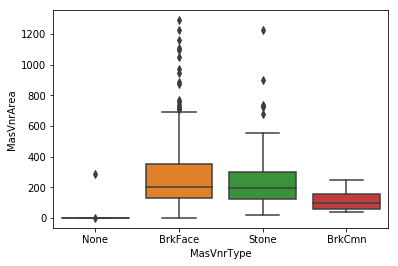

In [189]:
#查看MasVnrType和MasVnrArea的关系，可判断MasVnrArea的缺失值填BrkFace
sns.boxplot(x='MasVnrType',y='MasVnrArea',data=test)

In [190]:
test.MasVnrType = test.MasVnrType.fillna('BrkFace')
test[test.MasVnrType.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [191]:
train.loc[:,'MasVnrArea'].value_counts()

0.0       869
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
337.0       1
415.0       1
293.0       1
621.0       1
Name: MasVnrArea, Length: 327, dtype: int64

In [192]:
#test---MSZoning缺失处理
print(test.MSZoning.value_counts())
test["MSZoning"] = test.MSZoning.fillna("None")
# test[test["MSZoning"].isnull()]

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


In [193]:
#LotFrontage缺失值处理，与MSSubClass存在很强的负相关
train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

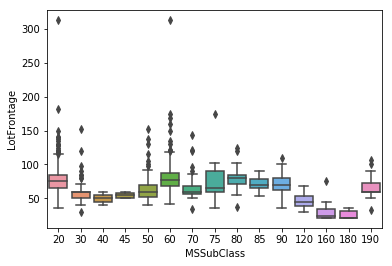

In [194]:
sns.boxplot(x='MSSubClass',y ='LotFrontage',data = train)

In [195]:
lotfg_missing = train[train.LotFrontage.isnull()].loc[:,['MSSubClass','LotFrontage']]
train.loc[:,['LotFrontage','MSSubClass']].groupby('MSSubClass').mean()

,LotFrontage
MSSubClass,
20,77.464531
30,60.349206
40,50.000000
45,55.000000
50,64.000000
60,81.056522
70,65.654545
75,77.533333
80,80.026316


In [196]:
train[train['MSSubClass']==20] = train[train['MSSubClass']==20].fillna({'LotFrontage':77.46})
train[train['MSSubClass']==30] = train[train['MSSubClass']==30].fillna({'LotFrontage':60.35})
train[train['MSSubClass']==40] = train[train['MSSubClass']==40].fillna({'LotFrontage':50.0})
train[train['MSSubClass']==45] = train[train['MSSubClass']==45].fillna({'LotFrontage':55.0})
train[train['MSSubClass']==50] = train[train['MSSubClass']==50].fillna({'LotFrontage':64})
train[train['MSSubClass']==60] = train[train['MSSubClass']==60].fillna({'LotFrontage':81.06})
train[train['MSSubClass']==70] = train[train['MSSubClass']==70].fillna({'LotFrontage':65.65})
train[train['MSSubClass']==75] = train[train['MSSubClass']==75].fillna({'LotFrontage':77.53})
train[train['MSSubClass']==80] = train[train['MSSubClass']==80].fillna({'LotFrontage':80.03})
train[train['MSSubClass']==85] = train[train['MSSubClass']==85].fillna({'LotFrontage':71.57})
train[train['MSSubClass']==90] = train[train['MSSubClass']==90].fillna({'LotFrontage':71.60})
train[train['MSSubClass']==120] = train[train['MSSubClass']==120].fillna({'LotFrontage':45.67})
train[train['MSSubClass']==160] = train[train['MSSubClass']==160].fillna({'LotFrontage':27.95})
train[train['MSSubClass']==180] = train[train['MSSubClass']==180].fillna({'LotFrontage':25.20})
train[train['MSSubClass']==190] = train[train['MSSubClass']==190].fillna({'LotFrontage':66.67})

In [197]:
#test --LotFrontage处理
test.loc[:,['LotFrontage','MSSubClass']].groupby('MSSubClass').mean()

,LotFrontage
MSSubClass,
20,77.862144
30,61.555556
40,58.500000
45,56.666667
50,62.350746
60,76.858491
70,62.935484
75,67.000000
80,77.510638


In [198]:
#test -- LotFrontage 删除等于150的数据
print(test[test.MSSubClass == 150])
test.drop([1358],inplace = True)
test[test['MSSubClass']==20] = test[test['MSSubClass']==20].fillna({'LotFrontage':77.86})
test[test['MSSubClass']==30] = test[test['MSSubClass']==30].fillna({'LotFrontage':61.55})
test[test['MSSubClass']==40] = test[test['MSSubClass']==40].fillna({'LotFrontage':58.5})
test[test['MSSubClass']==45] = test[test['MSSubClass']==45].fillna({'LotFrontage':56.7})
test[test['MSSubClass']==50] = test[test['MSSubClass']==50].fillna({'LotFrontage':62.35})
test[test['MSSubClass']==60] = test[test['MSSubClass']==60].fillna({'LotFrontage':76.86})
test[test['MSSubClass']==70] = test[test['MSSubClass']==70].fillna({'LotFrontage':62.94})
test[test['MSSubClass']==75] = test[test['MSSubClass']==75].fillna({'LotFrontage':67.0})
test[test['MSSubClass']==80] = test[test['MSSubClass']==80].fillna({'LotFrontage':77.51})
test[test['MSSubClass']==85] = test[test['MSSubClass']==85].fillna({'LotFrontage':74.89})
test[test['MSSubClass']==90] = test[test['MSSubClass']==90].fillna({'LotFrontage':70.04})
test[test['MSSubClass']==120] = test[test['MSSubClass']==120].fillna({'LotFrontage':43.83})
test[test['MSSubClass']==160] = test[test['MSSubClass']==160].fillna({'LotFrontage':25.93})
test[test['MSSubClass']==180] = test[test['MSSubClass']==180].fillna({'LotFrontage':28.})
test[test['MSSubClass']==190] = test[test['MSSubClass']==190].fillna({'LotFrontage':69.63})
print(test[test['MSSubClass']==190].LotFrontage)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1358  2819         150       RL          NaN     1700   Pave   NaN      Reg   

     LandContour Utilities      ...       PoolArea PoolQC Fence MiscFeature  \
1358         HLS    AllPub      ...              0   None   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition      SalePrice  
1358       0      4   2006        WD         Normal  151131.098734  

[1 rows x 81 columns]
65       70.00
79      100.00
96       60.00
99       60.00
350      63.00
374      41.00
377      60.00
559      65.00
630      63.00
634      60.00
640      69.00
643      60.00
675      60.00
683      60.00
686      69.63
731      56.00
804     195.00
1012     52.00
1015     59.00
1016     75.00
1021     70.00
1106     79.00
1119     75.00
1258     79.00
1266     80.00
1293     94.00
1311     70.00
1318     56.00
1323     50.00
1414     58.00
1432     50.00
Name: LotFrontage, dtype: float64


In [199]:
test[test.MSSubClass == 150]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [200]:
#其它缺失值处理
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [201]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1458
Data columns (total 81 columns):
Id               1458 non-null int64
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1458 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            107 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1456 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1457 non-

In [202]:
print(train.Alley.value_counts())
test.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64


Grvl    70
Pave    37
Name: Alley, dtype: int64

In [203]:
#Alley填充None
train.fillna({'Alley':'None'},inplace=True)
test.fillna({'Alley':'None'},inplace=True)
print(train.Alley.value_counts())
test.Alley.value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64


None    1351
Grvl      70
Pave      37
Name: Alley, dtype: int64

In [204]:
#test Utilities填充AllPub
print(test.Utilities.value_counts())
test.fillna({'Utilities':'AllPub'},inplace=True)
print(test.Utilities.value_counts())

AllPub    1456
Name: Utilities, dtype: int64
AllPub    1458
Name: Utilities, dtype: int64


In [205]:
#Electrical 填充SBrkr
print(train.Electrical.value_counts())
print("缺失数：",train.Electrical.isnull().sum())
train.fillna({'Electrical':'SBrkr'},inplace=True)
print("缺失数：",train.Electrical.isnull().sum())

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
缺失数： 1
缺失数： 0


In [206]:
#FireplaceQu填充None
print(train.FireplaceQu.isnull().sum())
train.fillna({'FireplaceQu':'None'},inplace=True)
test.fillna({'FireplaceQu':'None'},inplace=True)
print(train.FireplaceQu.isnull().sum())
print(test.FireplaceQu.isnull().sum())
# data = train[train.FireplaceQu.notnull()]
# data.FireplaceQu.isnull()
# print(data['Fireplaces'].groupby(data['FireplaceQu']).mean())
# fig = plt.figure()
# plt.scatter(data['FireplaceQu'],data['Fireplaces'])
# sns.boxplot(x='FireplaceQu',y='Fireplaces',data=train)

690
0
0


In [207]:
train.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [208]:
#Fence,填充None
train.fillna({'Fence':'None'},inplace=True)
test.fillna({'Fence':'None'},inplace=True)

In [209]:
#MiscFeature,填充None
print(train.MiscFeature.value_counts())
train.fillna({'MiscFeature':'None'},inplace=True)
test.fillna({'MiscFeature':'None'},inplace=True)

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


In [210]:
print(test.MiscFeature.value_counts())

None    1407
Shed      46
Gar2       3
Othr       2
Name: MiscFeature, dtype: int64


In [211]:
#GarageYrBlt时间序列缺失值处理,连续型数据映射为离散型。填充None
train.GarageYrBlt.value_counts().sort_index()
test.GarageYrBlt.value_counts().sort_index()

1895.0     1
1896.0     1
1900.0     5
1910.0     7
1915.0     5
1916.0     1
1917.0     2
1918.0     1
1919.0     1
1920.0    19
1921.0     2
1922.0     3
1923.0     3
1924.0     5
1925.0     5
1926.0     9
1927.0     4
1928.0     3
1930.0    19
1932.0     1
1934.0     2
1935.0     4
1936.0     2
1937.0     4
1938.0     8
1939.0    12
1940.0    11
1941.0     4
1942.0     4
1943.0     1
          ..
1982.0     5
1983.0     4
1984.0    11
1985.0     8
1986.0     6
1987.0     7
1988.0     6
1989.0     9
1990.0    10
1991.0     8
1992.0    14
1993.0    27
1994.0    21
1995.0    17
1996.0    20
1997.0    25
1998.0    27
1999.0    24
2000.0    28
2001.0    21
2002.0    27
2003.0    42
2004.0    46
2005.0    77
2006.0    56
2007.0    66
2008.0    32
2009.0     8
2010.0     2
2207.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

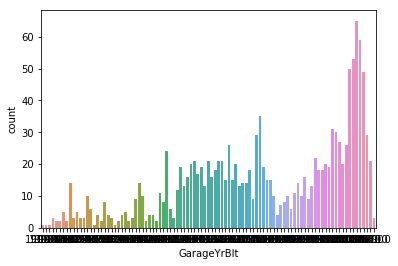

In [212]:
sns.countplot(x = 'GarageYrBlt',data = train)

In [213]:
year_map = pd.concat(pd.Series('YearGroup' + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))
train.GarageYrBlt = train.GarageYrBlt.map(year_map)
test.GarageYrBlt = test.GarageYrBlt.map(year_map)

In [214]:
train.fillna({'GarageYrBlt':'None'},inplace=True)
test.fillna({'GarageYrBlt':'None'},inplace=True)

In [215]:
#Exterior1st缺失值处理 删除---test
test.dropna(subset = ['Exterior1st'],inplace=True)#删除指定列的缺失值
test[test.Exterior1st.isnull()]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [216]:
#删除TotalBsmtSF缺失值
test.dropna(subset=['TotalBsmtSF'],inplace=True)

In [220]:
#批量删除缺失值['KitchenQual','Functional','GarageCars','GarageArea']
test.dropna(subset=['KitchenQual','Functional','GarageCars','GarageArea','SaleType'],inplace=True)

In [221]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1458
Data columns (total 81 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
Alley            1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non

In [222]:
#删除train中SalePrice中的异常值

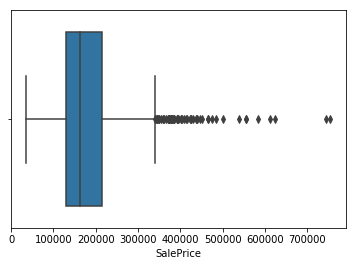

In [223]:
sns.boxplot(x='SalePrice',data=train)

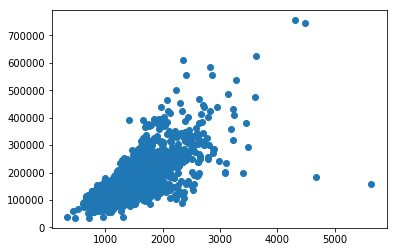

In [224]:
fig = plt.figure()
ax1 = plt.scatter(train.GrLivArea,train.SalePrice)
# ax1.xlabel='GrLivArea'
# ax1.ylabel='SalePrice'
# ax1.legand()

In [225]:
train.sort_values(by='GrLivArea').index
# train.drop()

Int64Index([ 533, 1100,  916,   29,  528,  696,  489,  434, 1449,  614,
            ...
             769,  635, 1268,  304,  185, 1169,  691, 1182,  523, 1298],
           dtype='int64', length=1460)

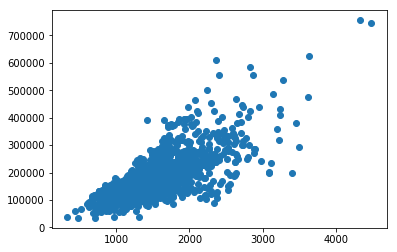

In [226]:
train = train.drop(index=[523,1298])
fig = plt.figure()
ax1 = plt.scatter(train.GrLivArea,train.SalePrice)

In [242]:
#保存清洗过的数据
train_cleaned = train
test_cleaned = test
train_cleaned.to_csv('train_cleaned.csv')
test_cleaned.to_csv('test_cleaned.csv')

In [243]:
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1458
Data columns (total 80 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null object
MSZoning         1451 non-null object
LotFrontage      1449 non-null float64
Street           1451 non-null object
Alley            1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 n

In [244]:
    #特征工程
#某些特征数值型转化成类别型['MSSubClass','OverallCond','YrSold','MoSold']
print(train[['MSSubClass','OverallCond','YrSold','MoSold']].info())
train_cleaned['MSSubClass']= train_cleaned['MSSubClass'].astype(str)
# train_cleaned['OverallCond'] = train_cleaned['OverallCond'].astype(str)
train_cleaned['YrSold'] = train_cleaned['YrSold'].astype(str)
train_cleaned['MoSold'] = train_cleaned['MoSold'].astype(str)
print(train[['MSSubClass','OverallCond','YrSold','MoSold']].info())
test_cleaned['MSSubClass']= test_cleaned['MSSubClass'].astype(str)
# test_cleaned['OverallCond'] = test_cleaned['OverallCond'].astype(str)
test_cleaned['YrSold'] = test_cleaned['YrSold'].astype(str)
test_cleaned['MoSold'] = test_cleaned['MoSold'].astype(str)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 4 columns):
MSSubClass     1458 non-null object
OverallCond    1458 non-null int64
YrSold         1458 non-null object
MoSold         1458 non-null object
dtypes: int64(1), object(3)
memory usage: 97.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 4 columns):
MSSubClass     1458 non-null object
OverallCond    1458 non-null int64
YrSold         1458 non-null object
MoSold         1458 non-null object
dtypes: int64(1), object(3)
memory usage: 97.0+ KB
None


5    819
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

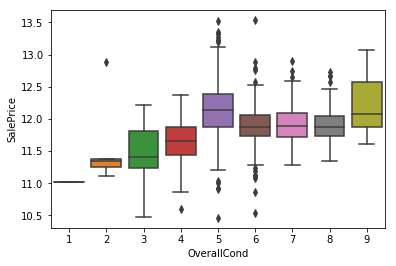

In [245]:
# OverallCond
sns.boxplot(x='OverallCond',y='SalePrice',data=train)
train[['MSSubClass','OverallCond','YrSold','MoSold']].OverallCond.value_counts()

2009    338
2007    328
2006    314
2008    303
2010    175
Name: YrSold, dtype: int64

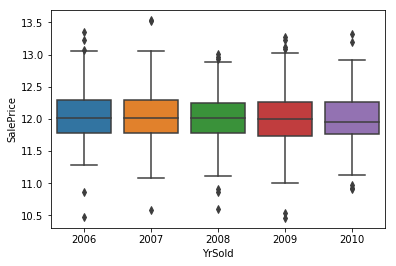

In [246]:
#YrSold
sns.boxplot(x='YrSold',y='SalePrice',data=train)
train[['MSSubClass','OverallCond','YrSold','MoSold']].YrSold.value_counts()

SalePrice峰度：0.80
SalePrice偏度：0.12


(array([ 1.,  1.,  1.,  4.,  1.,  1.,  2.,  2.,  0.,  4.,  1.,  7.,  4.,
         3.,  7., 16.,  8.,  9., 13., 14., 19., 25., 23., 25., 27., 25.,
        30., 25., 28., 23., 30., 29., 32., 31., 40., 45., 59., 48., 77.,
        65., 86., 68., 59., 50., 35., 39., 32., 21., 34., 24., 18., 32.,
        18., 15., 10., 11.,  8., 10.,  8., 10.,  9.,  4.,  4.,  1.,  4.,
         4.,  2.,  6.,  4.,  3.,  1.,  3.,  1.,  1.,  1.,  3.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([2.55089625, 2.55144998, 2.5520037 , 2.55255742, 2.55311115,
        2.55366487, 2.5542186 , 2.55477232, 2.55532604, 2.55587977,
        2.55643349, 2.55698722, 2.55754094, 2.55809466, 2.55864839,
        2.55920211, 2.55975584, 2.56030956, 2.56086328, 2.56141701,
        2.56197073, 2.56252446, 2.56307818, 2.5636319 , 2.56418563,
        2.56473935, 2.56529308, 2.5658468 , 2.56640052, 2.56695425,
        2.56750797, 2.5680

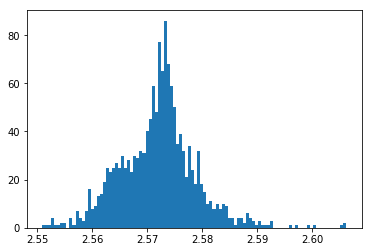

In [247]:
#使SalePrice符合正态分布
print("SalePrice峰度：%.2f"%train_cleaned['SalePrice'].kurt())
print("SalePrice偏度：%.2f"%train_cleaned['SalePrice'].skew())
train_cleaned['SalePrice'] = np.log1p(train_cleaned['SalePrice'])
test_cleaned['SalePrice'] = np.log1p(test_cleaned['SalePrice'])
fig = plt.figure()
plt.hist(test_cleaned.SalePrice,bins=100)


# ax1 = plt.scatter(train_cleaned.GrLivArea,train_cleaned.SalePrice)

In [248]:
#其它数据使用boxcox1p进行数据转换
from scipy.special import boxcox1p
t = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
for feat in t:
    train_cleaned[feat] = boxcox1p(train_cleaned[feat],0.15)
    test_cleaned[feat] = boxcox1p(train_cleaned[feat],0.15)


In [249]:

test_cleaned.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      2
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       2
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       2
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       2
OpenPorchSF      2
EnclosedPorch    2
3SsnPorch        2
ScreenPorch      2
PoolArea         2
PoolQC           0
Fence       

In [250]:
test_cleaned.drop(test_cleaned[test_cleaned['LotArea'].isnull()].index,inplace=True)

In [254]:
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1458
Data columns (total 81 columns):
Id               1449 non-null int64
MSSubClass       1449 non-null object
MSZoning         1449 non-null object
LotFrontage      1449 non-null float64
Street           1449 non-null object
Alley            1449 non-null object
LotShape         1449 non-null object
LandContour      1449 non-null object
Utilities        1449 non-null object
LotConfig        1449 non-null object
LandSlope        1449 non-null object
Neighborhood     1449 non-null object
Condition1       1449 non-null object
Condition2       1449 non-null object
BldgType         1449 non-null object
HouseStyle       1449 non-null object
OverallQual      1449 non-null int64
OverallCond      1449 non-null int64
YearBuilt        1449 non-null int64
YearRemodAdd     1449 non-null int64
RoofStyle        1449 non-null object
RoofMatl         1449 non-null object
Exterior1st      1449 non-null object
Exterior2nd      1449 n

In [255]:
#数值型数据进行标准化，
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
transfer.fit(train_cleaned[t])
train_cleaned[t] = transfer.transform(train_cleaned[t])
test_cleaned[t] = transfer.transform(test_cleaned[t])

In [140]:
#离散型转化成one-hot码
# train_cleaned = pd.get_dummies(train_cleaned)
train_feated = pd.get_dummies(train_cleaned)
test_feated = pd.get_d

In [142]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
Id               1458 non-null int64
MSSubClass       1458 non-null object
MSZoning         1458 non-null object
LotFrontage      1458 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            1458 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null object
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 n

In [144]:
#数值型数据处理
numeric_feats = train_cleaned.dtypes[train_cleaned.dtypes != "object"].index

In [146]:
numeric_feats

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [148]:
t = train_cleaned[numeric_feats].quantile(.75)
t

Id                 1094.75
LotFrontage          80.03
LotArea           11600.00
OverallQual           7.00
YearBuilt          2000.00
YearRemodAdd       2004.00
MasVnrArea          163.75
BsmtFinSF1          711.00
BsmtFinSF2            0.00
BsmtUnfSF           808.00
TotalBsmtSF        1296.75
1stFlrSF           1390.75
2ndFlrSF            728.00
LowQualFinSF          0.00
GrLivArea          1776.00
BsmtFullBath          1.00
BsmtHalfBath          0.00
FullBath              2.00
HalfBath              1.00
BedroomAbvGr          3.00
KitchenAbvGr          1.00
TotRmsAbvGrd          7.00
Fireplaces            1.00
GarageCars            2.00
GarageArea          576.00
WoodDeckSF          168.00
OpenPorchSF          68.00
EnclosedPorch         0.00
3SsnPorch             0.00
ScreenPorch           0.00
PoolArea              0.00
MiscVal               0.00
SalePrice        214000.00
Name: 0.75, dtype: float64